In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')

In [5]:
df.head()


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [6]:
df.isnull().sum()

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64

In [7]:
# no missing values
df.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


In [8]:
df.info()   # different data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [9]:
# check for duplicates
duplicates = df[df.duplicated()]
duplicates.shape[0]  # no duplicates

0

In [10]:
df.shape

(200, 12)

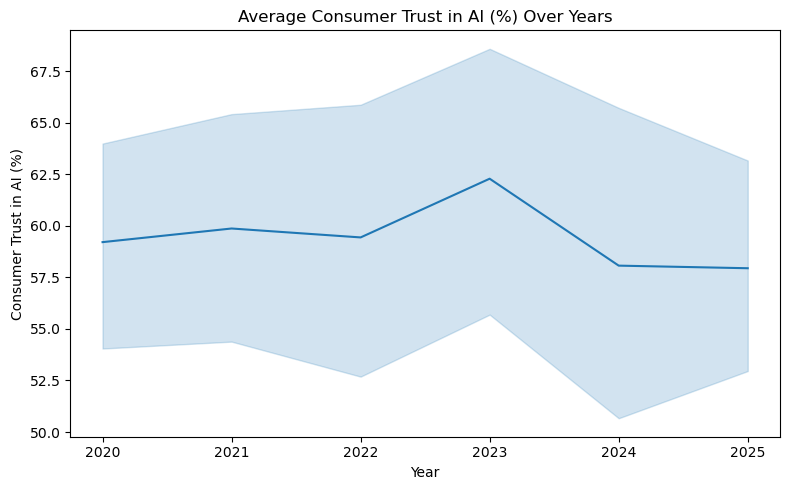

In [ ]:

# 1. Trend Over Time: AI Trust
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='Consumer Trust in AI (%)', estimator='mean')
plt.title('Average Consumer Trust in AI (%) Over Years')
plt.xticks(sorted(df["Year"].unique()))
plt.tight_layout()
plt.show()



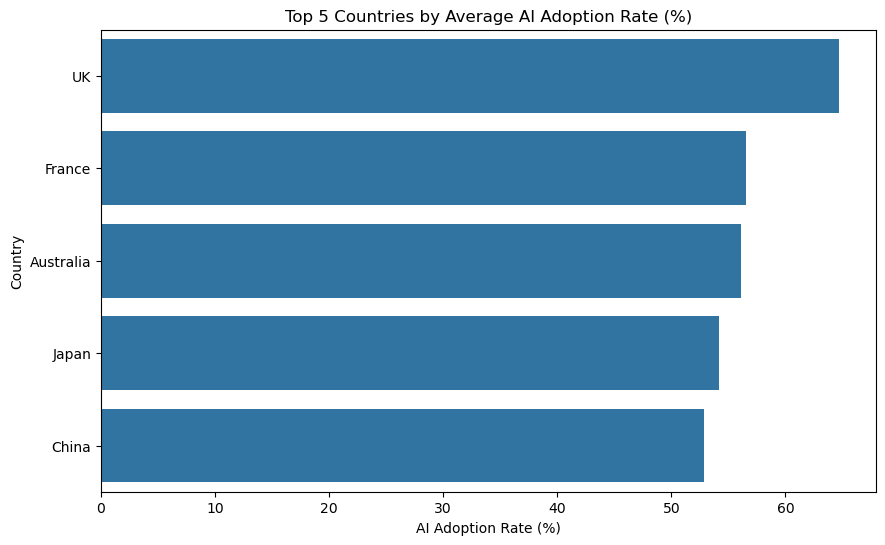

In [ ]:
# 2. Plot the top 5 countries with the highest AI adoption rate
country_adoption = df.groupby('Country')['AI Adoption Rate (%)'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_adoption.values, y=country_adoption.index)
plt.title("Top 5 Countries by Average AI Adoption Rate (%)")
plt.xlabel("AI Adoption Rate (%)")
plt.ylabel("Country")
plt.show()

# highest ai adopted country are usa .


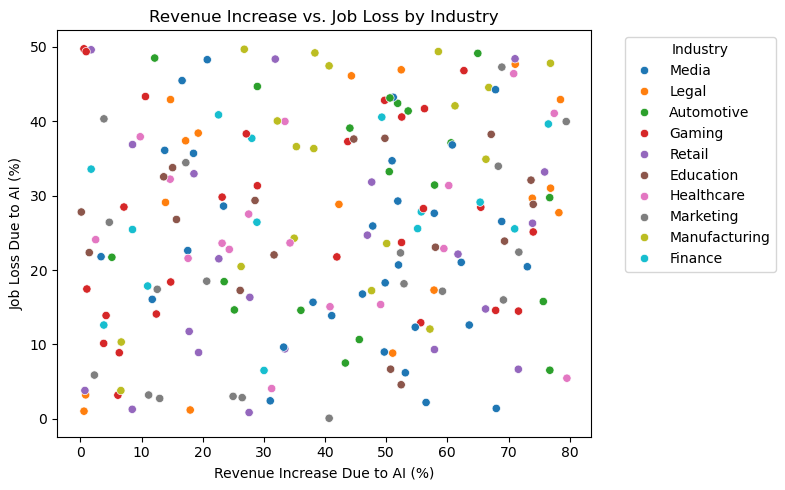

In [ ]:
# 3. Concise chart: Industry Revenue vs. Job Loss
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Revenue Increase Due to AI (%)', y='Job Loss Due to AI (%)', hue='Industry')
legend = plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Revenue Increase vs. Job Loss by Industry")
plt.xlabel("Revenue Increase Due to AI (%)")
plt.ylabel("Job Loss Due to AI (%)")
plt.tight_layout()
plt.show()

#  Different industries experience varying levels of revenue increase and job loss due to AI.
#  the industries that are heaviliy impacted by AI are: Finance, Healthcare, and Manufacturing.

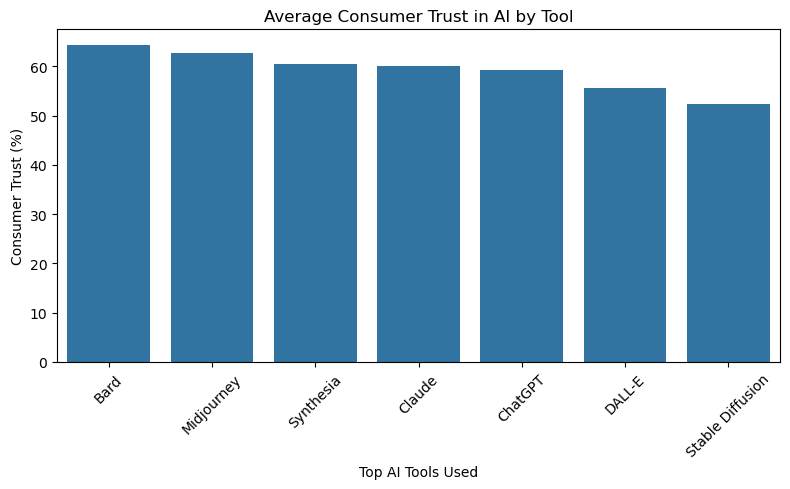

In [ ]:
# 4. AI Tool vs Consumer Trust
plt.figure(figsize=(8, 5))
tool_trust = df.groupby('Top AI Tools Used')['Consumer Trust in AI (%)'].mean().sort_values(ascending=False)
sns.barplot(x=tool_trust.index, y=tool_trust.values)
plt.title("Average Consumer Trust in AI by Tool")
plt.ylabel("Consumer Trust (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Consumer trust in AI tools varies, with some tools being more trusted than others.


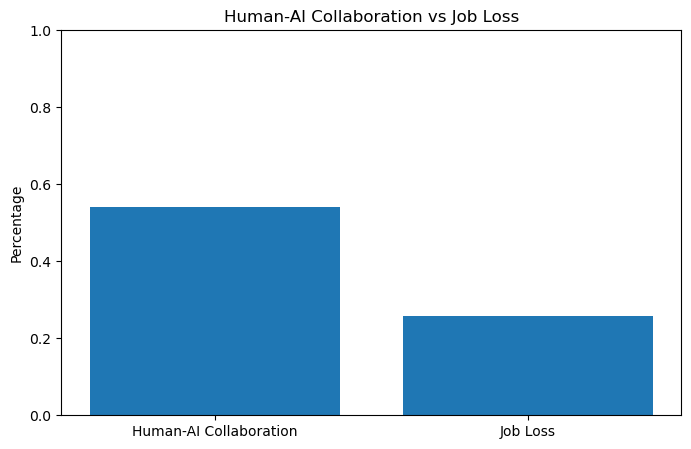

In [ ]:
# 5. Human-AI Collaboration vs Job Loss
plt.figure(figsize=(8, 5))
plt.bar(['Human-AI Collaboration', 'Job Loss'], [df['Human-AI Collaboration Rate (%)'].mean() / 100, df['Job Loss Due to AI (%)'].mean() / 100])
plt.title("Human-AI Collaboration vs Job Loss")
plt.ylabel("Percentage")
plt.ylim(0,1)
plt.show()

#  the Human AI collaboration rate is still higher than the job loss rate but it is still a concern.

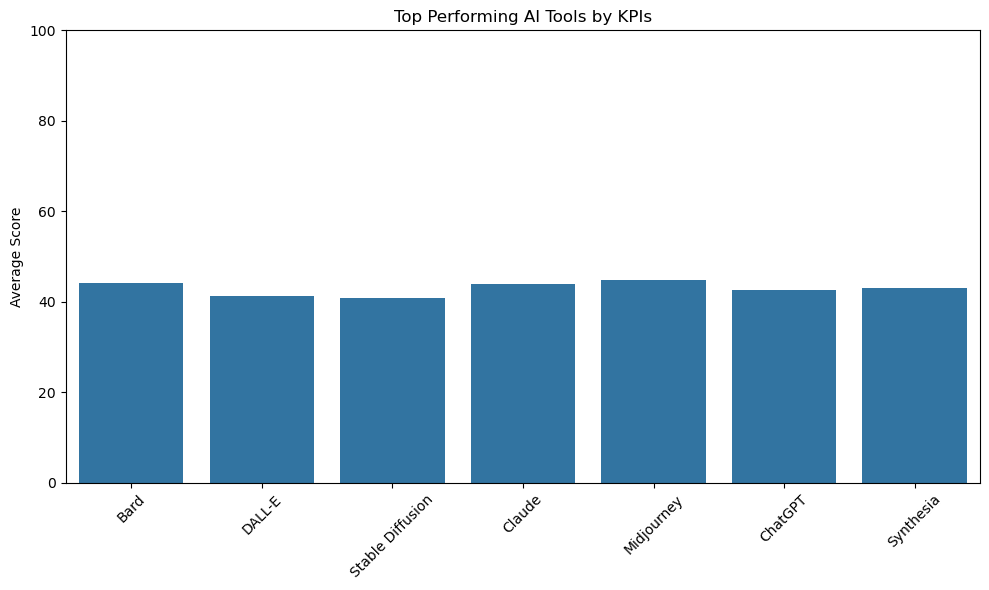

In [ ]:
# 6. Top Performing AI Tools by KPIs
plt.figure(figsize=(10, 6))

models = df['Top AI Tools Used'].unique()
kpis = ['Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']
scores = [df[df['Top AI Tools Used'] == model][kpis].mean().mean() for model in models]

sns.barplot(x=models, y=scores)
plt.title("Top Performing AI Tools by KPIs")
plt.ylabel("Average Score")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


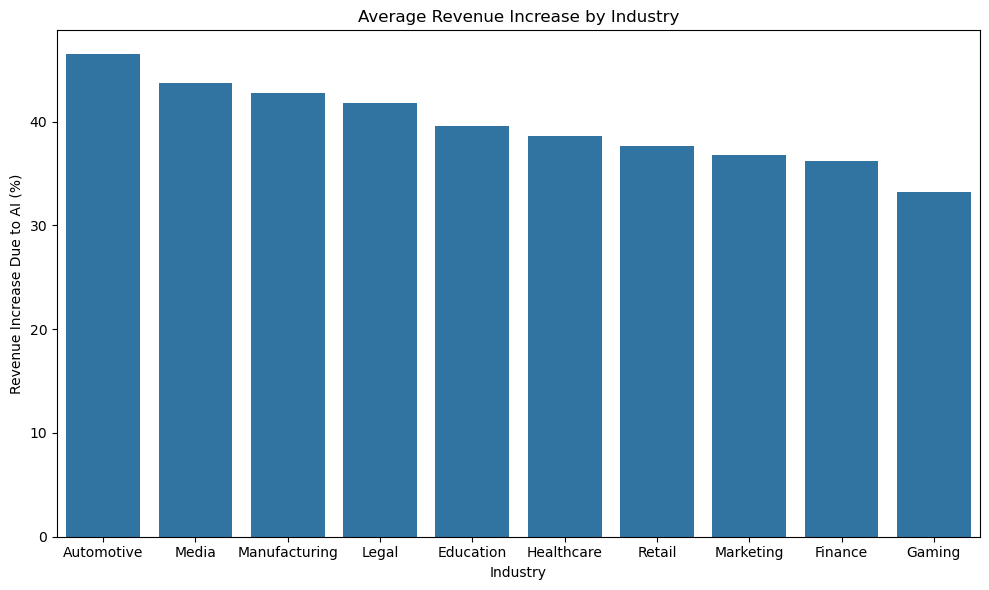

In [37]:
#7. Industry-wise: Collaboration vs Revenue Gain
plt.figure(figsize=(10, 6))
industry_revenue = df.groupby('Industry')['Revenue Increase Due to AI (%)'].mean().sort_values(ascending=False)
sns.barplot(x=industry_revenue.index, y=industry_revenue.values, )
plt.title("Average Revenue Increase by Industry")
plt.xlabel("Industry")
plt.ylabel("Revenue Increase Due to AI (%)")
plt.tight_layout()
plt.show()

# highest revenue generating industries are 

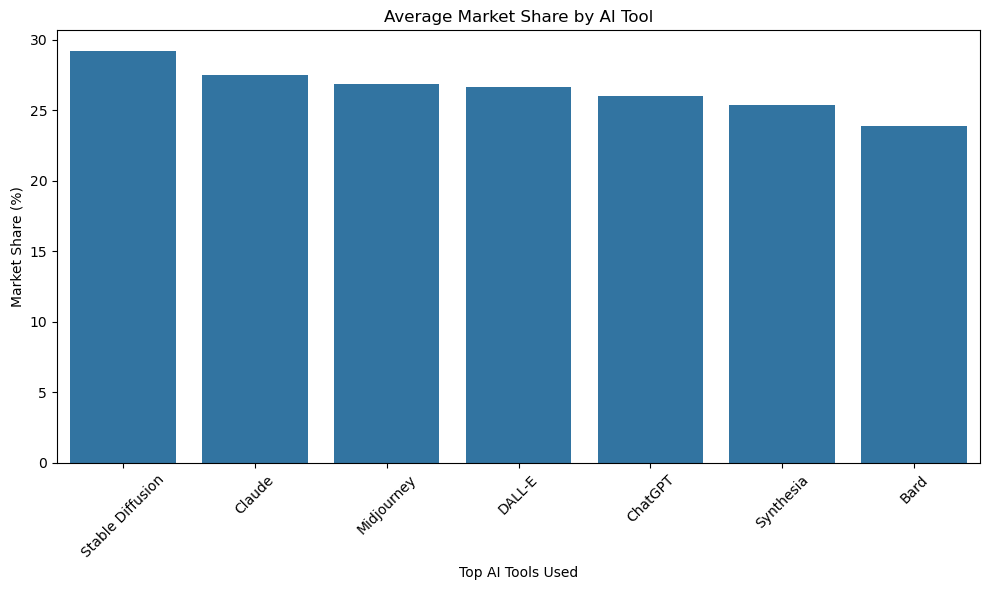

In [ ]:
# 8. Market Shre of AI Companies by Tool
plt.figure(figsize = (10, 6))
market_share = df.groupby('Top AI Tools Used')['Market Share of AI Companies (%)'].mean().sort_values(ascending=False)
sns.barplot(x=market_share.index, y=market_share.values,)
plt.title("Average Market Share by AI Tool")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# highest market share generating tools are Stable diffusion . 


<Figure size 1000x600 with 0 Axes>

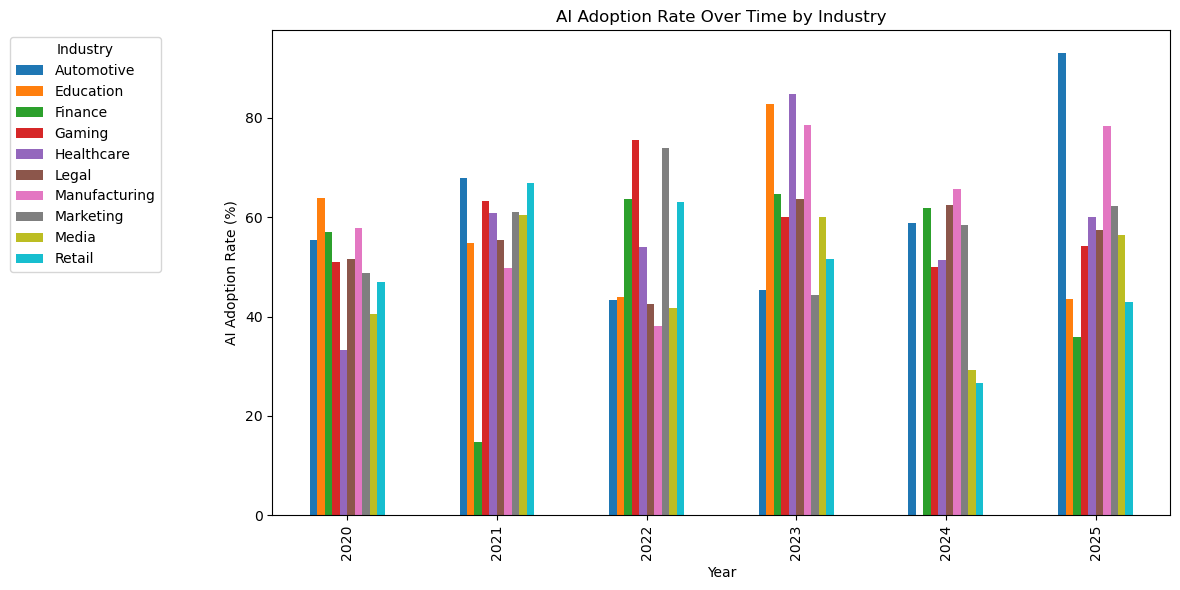

In [ ]:
#9. Time Evolution per Industry
plt.figure(figsize=(10, 6))
industry_time = df.groupby(['Year', 'Industry'])['AI Adoption Rate (%)'].mean().unstack()
industry_time.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("AI Adoption Rate Over Time by Industry")
plt.xlabel("Year")
plt.ylabel("AI Adoption Rate (%)")
plt.legend(title='Industry', bbox_to_anchor=(-0.3, 1), loc='upper left')  # Move legend to the left
plt.tight_layout()
plt.show()

# AI usage is increaing over time in all the industries. 

In [ ]:
# column transformer ->  seprate categorical and numerical data
# perform normalization on numerical data and one-hot encoding on categorical data
# use pipeline to combine these steps

In [46]:
# check for duplicates
df.duplicated().sum()  # no duplicates

0

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# there are no mising values 
# there are no duplicates

# sepearting data 
def seprating_data(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    return categorical_cols, numerical_cols

# splitting data .
def preprocessing_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    categorical_cols, numerical_cols = seprating_data(X)

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return preprocessor, X_train, X_test, y_train, y_test, categorical_cols, numerical_cols

def apply_preprocessing(preprocessor, X_train, X_test):
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)
    return X_train_transformed, X_test_transformed

# creating pipeline 
def create_pipeline(preprocessor):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    return pipeline

def main():
    df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
    target_column = 'Consumer Trust in AI (%)'  

    preprocessor, X_train, X_test, y_train, y_test, cat_cols, num_cols = preprocessing_data(df, target_column)

    X_train_transformed, X_test_transformed = apply_preprocessing(preprocessor, X_train, X_test)

    # dataframe 
    one_hot_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out()
    transformed_columns = list(num_cols) + list(one_hot_encoded_cols)

    X_train_df = pd.DataFrame(X_train_transformed.toarray(), columns=transformed_columns)
    X_test_df = pd.DataFrame(X_test_transformed.toarray(), columns=transformed_columns)

    return X_train_df, X_test_df, y_train, y_test

X_train_df, X_test_df, y_train, y_test = main()

print("Transformed training data:")
print(X_train_df.head())


Transformed training data:
       Year  AI Adoption Rate (%)  AI-Generated Content Volume (TBs per year)  \
0 -0.738687              0.336433                                    1.188447   
1  0.355664              0.451040                                    0.083314   
2 -0.191511             -0.437276                                   -0.717620   
3  0.355664              1.401489                                   -1.422116   
4 -1.285863              1.149603                                    1.012492   

   Job Loss Due to AI (%)  Revenue Increase Due to AI (%)  \
0               -1.391163                        0.458854   
1                1.091479                        1.675201   
2                1.793127                        0.789622   
3                0.802609                       -1.105626   
4               -1.012721                       -0.936218   

   Human-AI Collaboration Rate (%)  Market Share of AI Companies (%)  \
0                         1.465090             

In [3]:
X_test_df.head()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Market Share of AI Companies (%),Country_Australia,Country_Canada,Country_China,...,Top AI Tools Used_Bard,Top AI Tools Used_ChatGPT,Top AI Tools Used_Claude,Top AI Tools Used_DALL-E,Top AI Tools Used_Midjourney,Top AI Tools Used_Stable Diffusion,Top AI Tools Used_Synthesia,Regulation Status_Lenient,Regulation Status_Moderate,Regulation Status_Strict
0,0.902840,-1.136678,0.812174,1.792381,-1.649848,0.007972,-0.425461,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.902840,0.542139,1.673000,-1.229933,0.473253,-1.587002,-1.385207,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.191511,0.508974,0.620654,-1.223962,-0.870996,-0.655300,-0.317599,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.285863,1.624407,-0.670585,1.717737,-0.339903,1.134754,-1.233320,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.285863,-0.495629,0.183812,1.334816,0.477065,-0.120520,0.507870,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# impact on sectors 
# 